In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10  # Default font size to 10 for everything

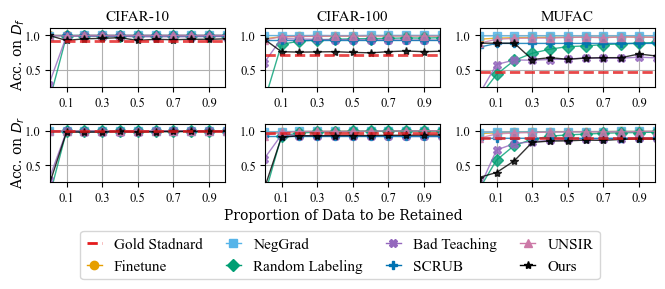

In [43]:
"""
rfm: Mean forget accuracy of retrained model
rfstd: Std forget accuracy of retrained model
rrm: Mean retain accuracy of retrained model
rrstd: Std retain accuracy of retrained model
"""

# Define method order and colors
method_order = [
    "finetune",
    "neggrad",
    "amnesiac",
    "bad-teacher",
    "scrub",
    "ssd",
    "unsir",
    "our"
]
colorBlindPalette = ['#E69F00', '#56B4E9', '#009E73', '#9467BD', '#0072B2', '#D55E00', '#CC79A7','#000000']
markers = ['o', 's', 'D', 'X', 'P', 'v', '^', '*']
legend_names = [
    "Finetune",
    "NegGrad",
    "Random Labeling",
    "Bad Teaching",
    "SCRUB",
    "SSD",
    "UNSIR",
    "Ours"
]

csv_names = ["resnet-10", "resnet-100", "resnet-mufac"]
titles = ["CIFAR-10", "CIFAR-100", "MUFAC"]
rfms = [0.92, 0.71, 0.47]
rfstds = [0, 0.19, 0.03]
rrms = [0.99, 0.96, 0.89]
rrstds = [0, 0.04, 0.04]
linewidth = 1
markersize = 6
fontsize = 10 

fig, axs = plt.subplots(2, 3, figsize=(6.6, 2.25))
j=-1
for csv_name, title, rfm, rfstd, rrm, rrstd in zip(csv_names, titles, rfms, rfstds, rrms, rrstds):
    j+=1
    data = pd.read_csv("csv_results/dataset_ablation/" + csv_name + ".csv")

    # Filter out the data for 0.0
    # data = data[data["Dr_subset_size"] != 0.0]


    # Group by method and Dr_subset_size, then calculate mean and std for acc_forget and acc_retain
    grouped_data = (
        data.groupby(["method", "Dr_subset_size"])
        .agg({"acc_forget": ["mean", "std"], "acc_retain": ["mean", "std"]})
        .reset_index()
    )

    # Flatten the MultiIndex columns
    grouped_data.columns = [
        "method",
        "Dr_subset_size",
        "acc_forget_mean",
        "acc_forget_std",
        "acc_retain_mean",
        "acc_retain_std",
    ]

    for method, color, legend_name, marker in zip(method_order, colorBlindPalette, legend_names, markers):
        if method == "ssd":
            continue
        method_data = grouped_data[grouped_data["method"] == method]

        acc_forget_mean = method_data["acc_forget_mean"] 
        acc_forget_std = method_data["acc_forget_std"] 
        acc_retain_mean = method_data["acc_retain_mean"] 
        acc_retain_std = method_data["acc_retain_std"] 

        axs[0][j].plot(
            method_data["Dr_subset_size"].values,
            acc_forget_mean.values,
            color=color,
            linewidth=linewidth,
            alpha=0.8,
            label=legend_name,
            marker=marker,
            markersize=markersize
        )
        # axs[0][j].fill_between(
        #     method_data["Dr_subset_size"].values,
        #     acc_forget_mean.values - acc_forget_std.values,
        #     acc_forget_mean + acc_forget_std.values,
        #     color=color,
        #     alpha=0.2,
        # )

        axs[1][j].plot(
            method_data["Dr_subset_size"].values,
            acc_retain_mean.values,
            color=color,
            linestyle="-",
            linewidth=linewidth,
            alpha=0.8,
            label=legend_name,
            marker=marker,
            markersize=markersize
        )
        # axs[1][j].fill_between(
        #     method_data["Dr_subset_size"].values,
        #     acc_retain_mean.values - acc_retain_std.values,
        #     acc_retain_mean.values + acc_retain_std.values,
        #     color=color,
        #     linestyle="-",
        #     alpha=0.2,
        # )

        i += 1
    # Add dashed lines for specified mean and std
    x = np.linspace(0.1, 1, 10)
    axs[0][j].axhline(y=rfm, color="#e41a1c", linestyle="--", linewidth=linewidth+1, alpha=0.8)
    # axs[0][j].fill_between(x, rfm - rfstd, rfm + rfstd, color="#e41a1c", alpha=0.1)
    axs[1][j].axhline(y=rrm, color="#e41a1c", linestyle="--", linewidth=linewidth+1, alpha=0.8)
    # axs[1][j].fill_between(x, rrm - rrstd, rrm + rrstd, color="#e41a1c", alpha=0.1)

    # Set labels, titles, and legend
    axs[0][j].set_xticks([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
    axs[0][j].tick_params(axis='x', labelsize=fontsize-1)  # Set x-tick font size
    axs[0][j].tick_params(axis='y', labelsize=fontsize-1)  # Set x-tick font size
    axs[0][j].set_title(title, fontsize=fontsize+1)
    axs[0][j].grid(True)
    axs[0][j].margins(0)
    axs[0][j].set_ylim(0.25, 1.1)
    axs[0][j].set_xlim(0.01, 0.99)

    axs[1][j].set_xticks([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
    axs[1][j].tick_params(axis='x', labelsize=fontsize-1)  # Set x-tick font size
    axs[1][j].tick_params(axis='y', labelsize=fontsize-1)  # Set x-tick font size
    axs[1][j].grid(True)
    axs[1][j].margins(0)
    axs[1][j].set_ylim(0.25, 1.1)
    axs[1][j].set_xlim(0.01, 0.99)


# y-axis labels to the left side of the figure
fig.text(0, 0.735, 'Acc. on $D_f$', va='center', rotation='vertical', fontdict={'family': 'Serif', 'size': fontsize})
fig.text(0, 0.3, 'Acc. on $D_r$', va='center', rotation='vertical', fontdict={'family': 'Serif', 'size': fontsize})
# a common x-axis label
fig.text(0.505, 0, 'Proportion of Data to be Retained', ha='center', fontdict={'family': 'Serif', 'size': fontsize})

# Combine all legend handles
dashed_line = Line2D(
    [0], [0], color="#e41a1c", linestyle="--", linewidth=2, label="Gold Stadnard"
)
handles = [dashed_line]
for method, color, legend_name, marker in zip(method_order, colorBlindPalette, legend_names, markers):
    if method == "ssd":
        continue
    handles.append(Line2D([0], [0], color=color, marker=marker, linestyle='-', linewidth=linewidth, label=legend_name))

# Add a common legend at the bottom
fig.legend(handles=handles, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.3), fontsize=fontsize+1, columnspacing=1.5, handlelength=1)


plt.tight_layout()
plt.savefig(
    "images/dataset_ablation.png", dpi=300, bbox_inches="tight", pad_inches=0.01
)
plt.show()